In [3]:
from data_processing import subject_info
subject_info

,Age,DominantHand,Height,MaxHR,RestingHR,Sex,Weight
SubjectID,,,,,,,
101,27,right,182,193,75,Male,83
102,25,right,169,195,74,Female,78
103,31,right,187,189,68,Male,92
104,24,right,194,196,58,Male,95
105,26,right,180,194,70,Male,73
106,26,right,183,194,60,Male,69
107,23,right,173,197,60,Male,86
108,32,left,179,188,66,Male,87
109,31,right,168,189,54,Male,65


In [4]:
from data_processing import col_names
for n in col_names:
    print n, ' ',           # in Python 2 for now..

timestamp   activityID   heartrate   hand_temp   hand_accel_x   hand_accel_y   hand_accel_z   hand_bad1   hand_bad2   hand_bad3   hand_gyro_x   hand_gyro_y   hand_gyro_z   hand_magnet_x   hand_magnet_y   hand_magnet_z   hand_orient_1   hand_orient_2   hand_orient_3   hand_orient_4   chest_temp   chest_accel_x   chest_accel_y   chest_accel_z   chest_bad1   chest_bad2   chest_bad3   chest_gyro_x   chest_gyro_y   chest_gyro_z   chest_magnet_x   chest_magnet_y   chest_magnet_z   chest_orient_1   chest_orient_2   chest_orient_3   chest_orient_4   ankle_temp   ankle_accel_x   ankle_accel_y   ankle_accel_z   ankle_bad1   ankle_bad2   ankle_bad3   ankle_gyro_x   ankle_gyro_y   ankle_gyro_z   ankle_magnet_x   ankle_magnet_y   ankle_magnet_z   ankle_orient_1   ankle_orient_2   ankle_orient_3   ankle_orient_4  


## Lets have a look at _subject101_, a 27 year old man, descending stairs

In [5]:
import pandas as pd
df = pd.read_csv('PAMAP2_Dataset/Protocol/subject101.dat', sep=' ', names=col_names)

In [5]:
df.head(2)

,timestamp,activityID,heartrate,hand_temp,hand_accel_x,hand_accel_y,hand_accel_z,hand_bad1,hand_bad2,hand_bad3,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_magnet_x,ankle_magnet_y,ankle_magnet_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0


In [6]:
df['timestamp'] = df['timestamp'].apply((lambda x: pd.to_timedelta(x, unit='s')))

In [7]:
df.shape

(376417, 54)

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_timedelta.html

In [7]:
df.groupby(['activityID']).count()['timestamp']

activityID
0     126460
1      27187
2      23480
3      21717
4      22253
5      21265
6      23575
7      20265
12     15890
13     14899
16     22941
17     23573
24     12912
Name: timestamp, dtype: int64

## That's a lot of timestamps..

http://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring

Attribute Information:

The 54 columns in the data files are organized as follows:
1. timestamp (s)
2. activityID (see below for the mapping to the activities)
3. heart rate (bpm)
4-20. IMU hand
21-37. IMU chest
38-54. IMU ankle

The IMU sensory data contains the following columns:
* 1. temperature (Â°C)
* 2-4. 3D-acceleration data (ms-2), scale: Â±16g, resolution: 13-bit
* 5-7. 3D-acceleration data (ms-2), scale: Â±6g, resolution: 13-bit
* 8-10. 3D-gyroscope data (rad/s)
* 11-13. 3D-magnetometer data (Î¼T)
* 14-17. orientation (invalid in this data collection)

List of activityIDs and corresponding activities:

zero - other (transient activities)

1. lying
2. sitting
3. standing
4. walking
5. running
6. cycling
7. Nordic walking
9. watching TV
10. computer work
11. car driving
12. ascending stairs
13. descending stairs
16. vacuum cleaning
17. ironing
18. folding laundry
19. house cleaning
20. playing soccer
24. rope jumping


In [8]:
dfDownstairs = df[df['activityID'] == 12]
dfDownstairs.head(1)

,timestamp,activityID,heartrate,hand_temp,hand_accel_x,hand_accel_y,hand_accel_z,hand_bad1,hand_bad2,hand_bad3,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_magnet_x,ankle_magnet_y,ankle_magnet_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4
154281,00:25:51.190000,12,NaN,33.8125,2.50159,7.32598,5.32562,2.82499,7.47736,5.69769,...,-0.010195,-0.010306,-0.009147,-18.0111,-3.09804,52.42,1.0,0.0,0.0,0.0


In [9]:
dfDownstairs.set_index('timestamp', inplace=True)

In [11]:
dfDownstairs.shape

(15890, 53)

In [12]:
dfDownstairs.head(2)

,activityID,heartrate,hand_temp,hand_accel_x,hand_accel_y,hand_accel_z,hand_bad1,hand_bad2,hand_bad3,hand_gyro_x,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_magnet_x,ankle_magnet_y,ankle_magnet_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4
timestamp,,,,,,,,,,,,,,,,,,,,,
00:25:51.190000,12,NaN,33.8125,2.50159,7.32598,5.32562,2.82499,7.47736,5.69769,0.021018,...,-0.010195,-0.010306,-0.009147,-18.0111,-3.09804,52.4200,1.0,0.0,0.0,0.0
00:25:51.200000,12,NaN,33.8125,2.69990,7.32687,5.59800,2.86882,7.38636,5.62234,0.051259,...,0.000103,-0.008209,-0.006737,-18.4477,-3.85649,52.5393,1.0,0.0,0.0,0.0


## Of the big list of sensors above, if you were going to try to detect stair climbing, the ankle sensors would be probably the best features to use. Hand acceleration, heartrate etc would be much weaker features, so start by just plotting that. 

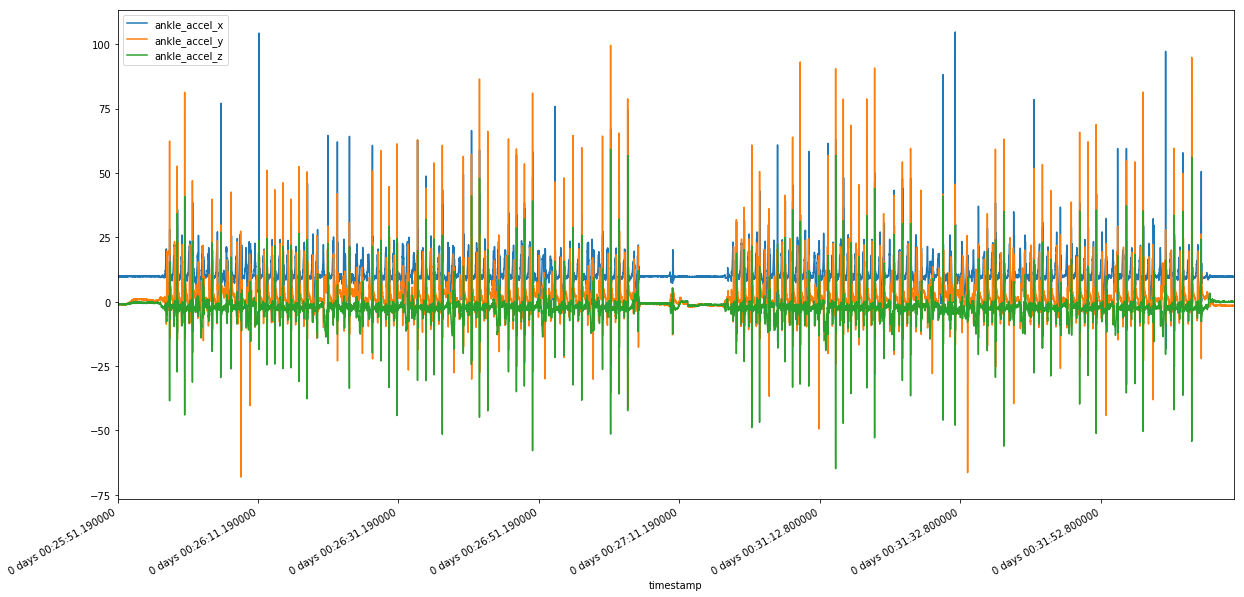

In [16]:
%matplotlib inline
dfDownstairs[['ankle_accel_x','ankle_accel_y','ankle_accel_z']].plot(figsize=(20,10))

## That's too much time to see what is happening, 6 minutes. Try a smaller time period

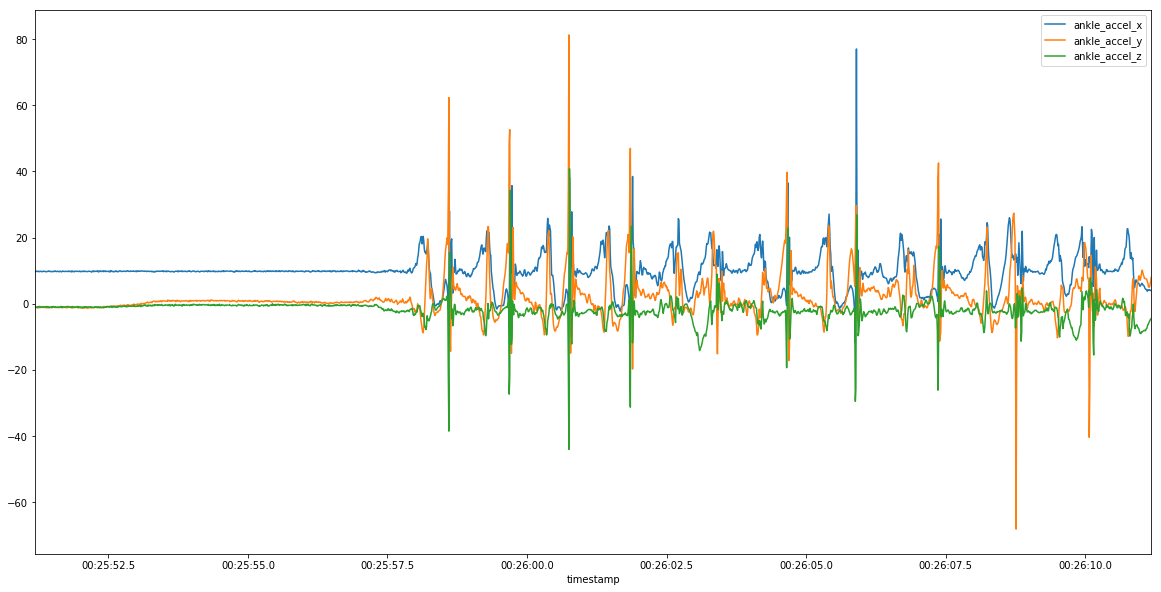

In [119]:
dfDownstairs[['ankle_accel_x','ankle_accel_y','ankle_accel_z']].head(2000).plot(figsize=(20,10))

## ...zoom in some more

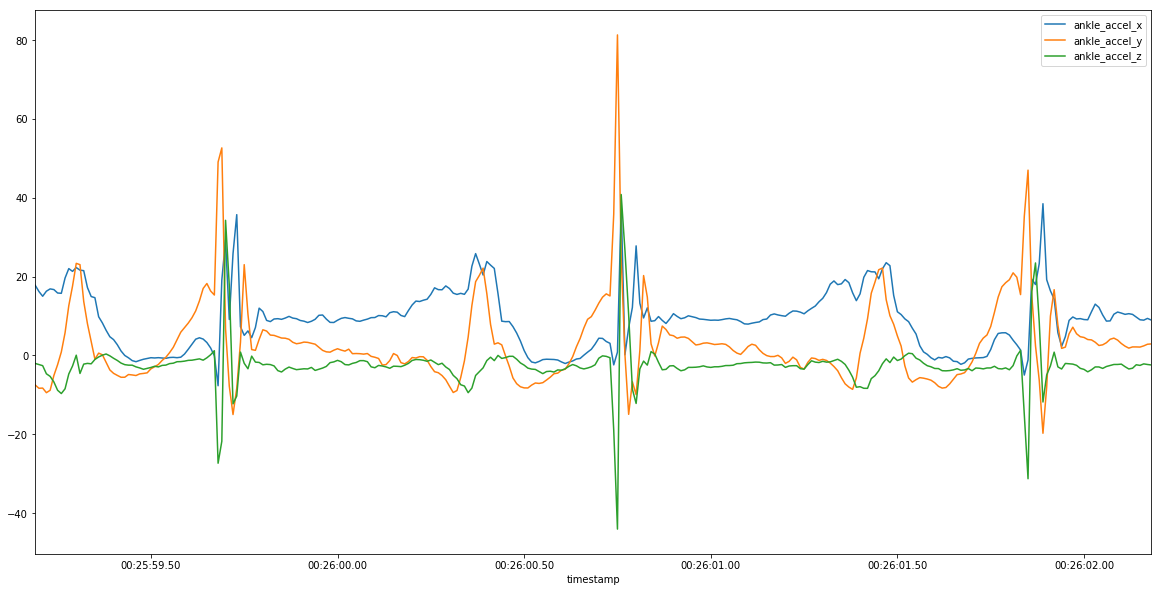

In [27]:
dfDownstairs[['ankle_accel_x','ankle_accel_y','ankle_accel_z']].iloc[800:1100].plot(figsize=(20,10))

## Have a look at ankle Gyro for the same period

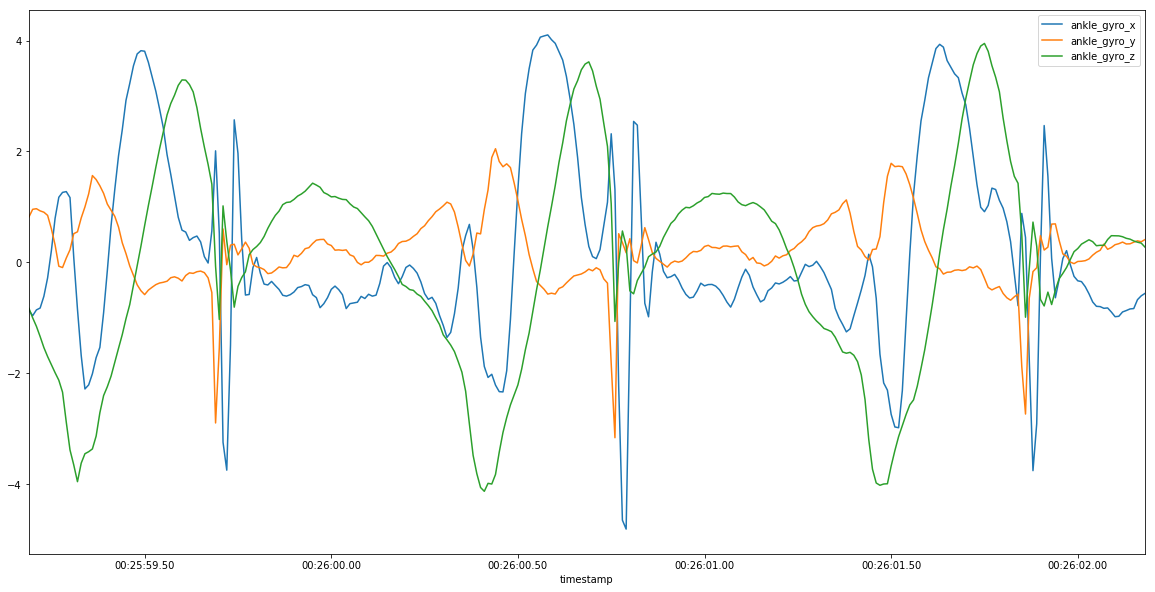

In [28]:
dfDownstairs[['ankle_gyro_x','ankle_gyro_y','ankle_gyro_z']].iloc[800:1100].plot(figsize=(20,10))